## Lesson-01

In [96]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [97]:
simplest_grammar = """
number = number number | single_number
single_number = 1|2|3|4|5|6|7|8|9|0
"""

In [98]:
import random

In [99]:
def adj(): return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0] 
# 生成形容词
    # 用'|'切分
    # split() 按空格切分 
    #[0]：取第一个
adj()

'蓝色的'

In [100]:
def adj_star():
    return random.choice([None, adj() + adj()])
adj_star()

## But the question is ?
如果我们更换了语法，会发现所有写过的程序，都要重新写。:(

In [101]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的 
"""
# terminal ： 不能拓展的东西，终端
# 如果出现在等号左边，表示可以拓展，如果只出现在等号右边，则不能拓展
# 例如： Adj可以拓展，’蓝色的’不能拓展

In [102]:
def create_grammar(grammar_str, split = '=>', line_split='\n'): # 括号里等号右边 是默认值
    grammar = {}
    # 定义一个字典
    # key是 可以拓展的
    # value是 不能拓展的
    for line in grammar_str.split(line_split):
        if not line.strip(): continue  # 删除掉line前后的空格，如果为空，则继续读下一行
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]  # key 是 =>的左边，对应的value是=>的右边
    return grammar
# grammar

In [103]:
example_grammar = create_grammar(simple_grammar)
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [107]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target
    expanded = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n'else '\n' for e in expanded if e != 'null'])
# [e if e != '/n'else '\n'] : 如果 e 不等于/n 就得到e，如果其它（e等于/n）那e就换成 \n
# 例如下面那个单元的例子
# generate(gram = grammar, target = 'Adj*')

In [108]:
a = [1,2,3]
print([i if i !=1 else 100 for i in a])

[100, 2, 3]


In [109]:
generate(gram=example_grammar, target='sentence')

'这个蓝色的女人坐在一个桌子'

In [32]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [86]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

你好我是45号,请问你要赌博吗？
女士,你好我是411号,请问你要打猎吗？
您好我是8491号,您需要赌博吗？
小朋友,你好我是458号,您需要赌博吗？
你好我是2号,请问你要打牌吗？
你好我是39号,请问你要打猎吗？
女士,你好我是53号,您需要打猎吗？
女士,你好我是228号,请问你要打牌吗？
先生,您好我是1号,请问你要喝酒吗？
你好我是238号,请问你要打猎吗？
你好我是521号,您需要打猎吗？
先生,您好我是99号,您需要打猎吗？
你好我是6号,请问你要打猎吗？
你好我是2号,您需要喝酒吗？
您好我是4号,请问你要喝酒吗？
女士,你好我是339号,请问你要打猎吗？
你好我是79621号,请问你要喝酒吗？
你好我是42号,请问你要喝酒吗？
先生,你好我是24号,您需要打牌吗？
先生,你好我是7号,请问你要打牌吗？


## Data Driven
我们的目标是，希望做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

In [62]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n stmt }
while_exp=> while ( var ) { /n stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [106]:
generate(gram=create_grammar(programming, split='=>'), target='stmt')
# 这样显示的结果里 有 \n 

NameError: name 'generate' is not defined

In [77]:
print(generate(gram=create_grammar (programming, split='=>'), target='stmt'))

name2=database3


## Language Model

基于概率的方法
$$ language_model(String) = Probability(String) \in (0 , 1) $$
一句话有很多的单词组成 $$ w_1 w_2 w_3 w_4 $$
$$ P 表示 Probability $$
$$ P(w_1w_2w_3w_4) = P(w_1|w_2w_3w_4)*P(w_2w_3w_4) $$
$$ P(w_1w_2w_3w_4) = P(w_1|w_2w_3w_4)*P(w_2|w_3w_4)*P(w_3|w_4)*P(w_4) $$
how to get $$ P(w_1|w_2w_3w_4)? $$ 
$$ w_1的出现与 w_2w_3w_4 有关 $$
比如：“早上吃早饭” “早上吃晚饭” 出现了早上这个词，那晚饭这个词就不应该出现。晚饭这个词受早上这个词的影响

In [1]:
filename = '../material/sqlResult_1558435.csv' # ..表示返回当前程序所在文件夹的上一级目录

In [2]:
import pandas as pd 

In [3]:
# content = pd.read_csv(filename)
# 上面这个命令，会出现错误 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 0: invalid start byte
# 是因为编码解码方式不同的原因
# https://docs.python.org/2.4/lib/standard-encodings.html
# 改为下面这个
content = pd.read_csv(filename, encoding = 'gb18030')

In [ ]:
content.head()  # 把这个文件作为数据源

In [4]:
articles = content['content'].tolist()

In [5]:
len(articles)

89611

In [6]:
articles[110]

'在外国名著《麦田里的守望者》中，作者想要守护麦田里如自己内心一般纯真的孩子们。而驻村干部们，也在这个炎热的夏天里撸袖子上阵，真正做起了村民们的“麦田守望者”。\r\n三夏时节不等人\r\n你看到了吗？不停翻涌起伏、仿若铺陈至天边的金黄麦浪中，那若隐若现的人影，是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者。\r\n在这个炎热的夏季，他们深入田间地头，帮助村民们收割小麦。扛起收麦机，麦田中的每个人都显得兴致勃勃，一天下来就近22亩小麦收割完毕。\r\n志愿者麦麦提亚森擦去满脸的汗水，高兴地告诉驻村队员：“我们青年志愿者应该多做贡献，为村里的脱贫致富出把力。工作队带着我们为村里的老人服务，看到那些像我爷爷奶奶一样的老人赞许感谢的目光，我体会到了帮助他人的快乐。”（自治区新闻出版广电局驻村工作队孙敏 艾力依布拉音）\r\n麦收时节 我们在一起\r\n6月中旬的和田墨玉，麦田金黄，静待收割。\r\n6月14日、15日两天，自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道，帮助村里29户有需要的村民进行小麦收割工作。\r\n田间地头，罕勒克艾日克村志愿队的红旗迎风飘扬，格外醒目。10余台割麦机一起轰鸣，男人们在用机器收割小麦的同时，几名妇女也加入到志愿队，构成了一道美丽的麦收风景。\r\n休息空闲，工作队员和村民们坐在树荫下、田埂上，互相问好、聊天。语言交流有困难，就用手势、动作比划着聊天，有趣地交流方式不时引来阵阵欢笑。大家在一同享受丰收和喜悦，也一同增进着彼此的情感和友谊。（自治区高级人民法院驻村工作队周春梅 艾地艾木·阿不拉）\r\n细看稻菽千重浪\r\n6月15日，自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村，见到了自己的亲戚。现场处处都透出掩盖不住的喜悦，一声声亲切的“谢谢”、一个个结实的拥抱，都透露出浓浓的亲情。\r\n没坐一会儿，在嘘寒问暖中大家了解到在麦收的关键时刻，部分村民家中却存在收割难的问题。小麦成熟期短，收获的时间集中，天气的变化对小麦最终产量的影响极大，如果不能及时收割，会有不小损失的。于是，大家几乎立刻就决定要帮助亲戚们收割麦子。\r\n在茂密的麦地里，干部们每人手持一把镰刀，一字排开，挽起衣袖、卷起裤腿，挥舞着镰刀进行着无

In [7]:
# 内容有很多无用字符 \r\n一类的
# 利用正则表达式将其去除
# 正则表达式就是 你定义一种模式，表达式可以把满足这种模式的东西找出来
import re

In [8]:
def token(string):
    return re.findall('\w+', string)  # '\w+'把所有的单词找出来
# re.findall(pattern, string, flag=0)
# pattern 正则表达式
# string 表示需要处理的字符串
# flags 说明匹配模式，如是否大小写 re.I

In [113]:
token(articles[110])

['在外国名著',
 '麦田里的守望者',
 '中',
 '作者想要守护麦田里如自己内心一般纯真的孩子们',
 '而驻村干部们',
 '也在这个炎热的夏天里撸袖子上阵',
 '真正做起了村民们的',
 '麦田守望者',
 '三夏时节不等人',
 '你看到了吗',
 '不停翻涌起伏',
 '仿若铺陈至天边的金黄麦浪中',
 '那若隐若现的人影',
 '是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者',
 '在这个炎热的夏季',
 '他们深入田间地头',
 '帮助村民们收割小麦',
 '扛起收麦机',
 '麦田中的每个人都显得兴致勃勃',
 '一天下来就近22亩小麦收割完毕',
 '志愿者麦麦提亚森擦去满脸的汗水',
 '高兴地告诉驻村队员',
 '我们青年志愿者应该多做贡献',
 '为村里的脱贫致富出把力',
 '工作队带着我们为村里的老人服务',
 '看到那些像我爷爷奶奶一样的老人赞许感谢的目光',
 '我体会到了帮助他人的快乐',
 '自治区新闻出版广电局驻村工作队孙敏',
 '艾力依布拉音',
 '麦收时节',
 '我们在一起',
 '6月中旬的和田墨玉',
 '麦田金黄',
 '静待收割',
 '6月14日',
 '15日两天',
 '自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道',
 '帮助村里29户有需要的村民进行小麦收割工作',
 '田间地头',
 '罕勒克艾日克村志愿队的红旗迎风飘扬',
 '格外醒目',
 '10余台割麦机一起轰鸣',
 '男人们在用机器收割小麦的同时',
 '几名妇女也加入到志愿队',
 '构成了一道美丽的麦收风景',
 '休息空闲',
 '工作队员和村民们坐在树荫下',
 '田埂上',
 '互相问好',
 '聊天',
 '语言交流有困难',
 '就用手势',
 '动作比划着聊天',
 '有趣地交流方式不时引来阵阵欢笑',
 '大家在一同享受丰收和喜悦',
 '也一同增进着彼此的情感和友谊',
 '自治区高级人民法院驻村工作队周春梅',
 '艾地艾木',
 '阿不拉',
 '细看稻菽千重浪',
 '6月15日',
 '自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村',
 '见到了自己的亲戚',
 '现场处处都

In [116]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [17]:
articles_num = 1000 # you need change it to -1 when you do your homework

articles_clean = [''.join(token(str(a)))for a in articles[:articles_num]]

In [18]:
len(articles_clean)

1000

In [19]:
articles_clean[0]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息'

In [20]:
from collections import Counter
import jieba

In [21]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

In [22]:
def cut(string): return list(jieba.cut(string))
# jieba 是专门用与中文分词的，英文就是直接用空格分词

In [23]:
articles_words = [
    cut(string) for string in articles_clean
]

In [24]:
from functools import reduce
from operator import add, mul

In [30]:
# TOKENS = reduce(add, articles_words) # 将所有的单词全部加起来
with open('../material/article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [50]:
# articles_words[1]
TOKEN = []
for i,line in enumerate(open('../material/article_9k.txt')):
    # readline()模式：每次只读取一句话，处理速度就是快很多
    if i % 100 == 0: print(i)
    if i > 10000: break   
        # replace 10000 with a big number when you do your homework    
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900


In [46]:
len(TOKEN)

441274

In [47]:
from collections import  Counter

In [53]:
words_count = Counter(TOKEN) # 计数
words_count.most_common(20) # 出现最多的前20名

[('的', 23730),
 ('在', 6156),
 ('了', 5473),
 ('是', 3990),
 ('和', 3470),
 ('也', 2085),
 ('有', 2001),
 ('月', 1999),
 ('将', 1746),
 ('他', 1617),
 ('年', 1611),
 ('对', 1442),
 ('等', 1423),
 ('都', 1417),
 ('为', 1386),
 ('日', 1351),
 ('中', 1330),
 ('不', 1313),
 ('上', 1305),
 ('与', 1280)]

In [58]:
frequences = [f for w,f in words_count.most_common(20)]

In [59]:
x = [i for i in range(20)]

In [60]:
%matplotlib inline

In [61]:
import matplotlib.pyplot as plt

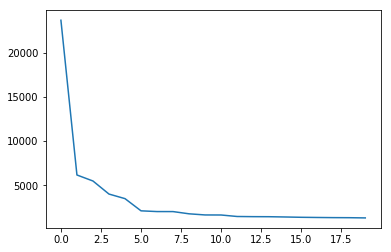

In [62]:
plt.plot(x, frequences)

In [63]:
import numpy as np

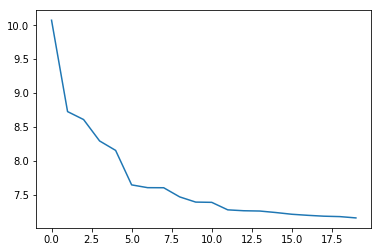

In [65]:
plt.plot(x, np.log(frequences))

In [66]:
TOKEN

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息',
 '\n',
 '骁龙',
 '835',
 '作为',
 '唯一',
 '通过',
 'Windows10',
 '桌面',
 '平台',
 '认证',
 '的',
 'ARM',
 '处理器',
 '高通',
 '强调',
 '不会',
 '因为',
 '只',
 '考虑',
 '性能',
 '而',
 '去',
 '屏蔽掉',
 '小',
 '核心',
 '相反',
 '他们',
 '正',
 '联手',
 '微软',
 '找到',
 '一种',
 '适合',
 '桌面',
 '平台',
 '的',
 '兼顾',
 '性能',
 '和',
 '功耗',
 '的',
 '完美',
 '方案',
 '报道',
 '称',
 '微软',
 '已经',
 '拿到',
 '了',
 '一些',
 '新',
 '的',
 '源码',
 '以便',
 'Windows10',
 '更好',
 '地',
 '理解',
 'biglittle',
 '架构',
 '资料',
 '显示',
 '骁龙',
 '835',
 '作为',
 '一

In [67]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [69]:
prob_1('的')  # 的 这个词在TOKEN的频率

0.05377611189419726

In [72]:
TOKEN = [str(t) for t in TOKEN]

In [78]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
# 到倒数第二个
 # 两个两个词连接起来

In [79]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [81]:
words_count_2 = Counter(TOKEN_2_GRAM)
type(words_count_2)

collections.Counter

In [83]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: 
        return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM) # 因为数据量比较少，所有用这个式子来代替缺省值

In [84]:
prob_2('我们', '在')

5.212204717271887e-05

In [92]:
def get_probability(sentence):
    words = cut(sentence)  # 把一整句话切词
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
#     print(sentence_pro)
    return sentence_pro

In [93]:
get_probability('小明今天抽奖抽到一台苹果手机')

8.126677471714374e-34

In [95]:
get_probability('洋葱奶昔来一杯')

1.163806790359005e-17

##### 这种单词构成句子 叫作 gram
##### 如果模型是用了两个词语组成 就叫 2-gram
##### 还可以有3个 4个   w1w2w3     w1w2w3w4

In [110]:
# 生成句子
for sen in [generate(gram = example_grammar, target = 'sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'. format(sen, get_probability(sen)))

sentence: 这个小小的蓝色的篮球坐在一个小小的好看的好看的蓝色的蓝色的小猫 with Prb: 8.709045671426578e-90
sentence: 这个好看的篮球听着一个女人 with Prb: 2.2099777384600086e-38
sentence: 一个桌子听着一个好看的女人 with Prb: 4.4199554769200173e-38
sentence: 一个小小的蓝色的小猫听着这个小小的小猫 with Prb: 6.305254949759161e-51
sentence: 一个好看的篮球看着这个女人 with Prb: 8.126677471714374e-34
sentence: 这个蓝色的小猫看着一个篮球 with Prb: 1.3544462452857291e-34
sentence: 一个女人看着一个女人 with Prb: 2.637390975087939e-23
sentence: 一个小小的蓝色的小小的小小的蓝色的女人听着一个小猫 with Prb: 8.805718230569325e-67
sentence: 一个蓝色的蓝色的篮球坐在一个桌子 with Prb: 1.391166231095062e-45
sentence: 这个小小的桌子听着这个篮球 with Prb: 5.4177849811429165e-34


In [111]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 7.144408607116654e-57
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 7.144408607116654e-57
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.7930376106491727e-28
---- 真是一只好看的小猫 with probility 7.912172925263817e-23
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.396568148430806e-16
---- 今晚火锅去吃我 with probility 5.274781950175878e-23
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.163806790359005e-17
---- 养乐多绿来一杯 with probility 5.135553499952989e-12
